In [1]:
import numpy as np

In [2]:
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [3]:
#rather calling through index like
xnew = [x[1],x[6],x[4]]
xnew

[92, 82, 60]

In [6]:
#we can do :
ind =[1,6,4]
xnew = x[ind]
xnew

array([92, 82, 60])

In [10]:
#shape for index array reflects the shape of new array rather than given array:
ind = np.array([[1,2],
               [5,6]])
x[ind]

array([[92, 14],
       [20, 82]])

In [11]:
x = np.arange(12).reshape(4,3)
x

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [14]:
row = np.array([1,2])
col = np.array([0,1])
x[row,col]

array([3, 7])

In [15]:
x[row[:, np.newaxis], col]

array([[3, 4],
       [6, 7]])

In [16]:
#modify value using fancy index
x = np.arange(10)
i = np.array([1,2,5,8])
x[i] = 99
x

array([ 0, 99, 99,  3,  4, 99,  6,  7, 99,  9])

In [17]:
x[i] -= 90
x

array([0, 9, 9, 3, 4, 9, 6, 7, 9, 9])

In [22]:
x = np.zeros(10)
i = [2,3,3,4,4,4]
x[i] += 1
x

array([0., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [35]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)
# add 1 to each of these bins
np.add.at(counts, i, 1)

In [36]:
 %matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [41]:
plt.plot(bins, counts, linestyle='steps')

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

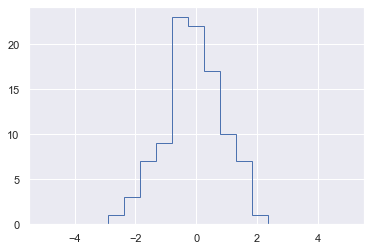

In [44]:
plt.hist(x, bins, histtype='step');

# K-Nearest Neighbor

In [45]:
X = rand.rand(10,2)

In [46]:
X

array([[0.86617615, 0.60111501],
       [0.70807258, 0.02058449],
       [0.96990985, 0.83244264],
       [0.21233911, 0.18182497],
       [0.18340451, 0.30424224],
       [0.52475643, 0.43194502],
       [0.29122914, 0.61185289],
       [0.13949386, 0.29214465],
       [0.36636184, 0.45606998],
       [0.78517596, 0.19967378]])

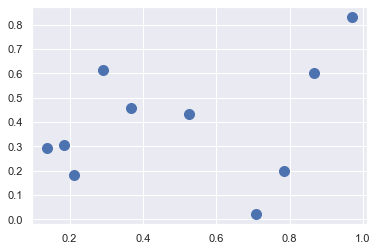

In [47]:
plt.scatter(X[:, 0], X[:, 1], s=100);

In [48]:
#calculate distance between each point
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)

In [49]:
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [53]:
sqdifferences = differences ** 2
sqdifferences.shape

(10, 10, 2)

In [54]:
dist_sq = sqdifferences.sum(-1)
dist_sq.shape

(10, 10)

In [56]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [58]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 2 5 9 8 6 1 4 3 7]
 [1 9 5 3 8 4 0 7 6 2]
 [2 0 5 9 8 6 1 4 7 3]
 [3 4 7 8 5 6 1 9 0 2]
 [4 7 3 8 6 5 1 9 0 2]
 [5 8 6 9 4 0 3 7 1 2]
 [6 8 5 4 7 3 0 9 2 1]
 [7 4 3 8 6 5 1 9 0 2]
 [8 5 6 4 7 3 9 0 1 2]
 [9 1 5 0 8 3 4 6 7 2]]


In [59]:
 K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

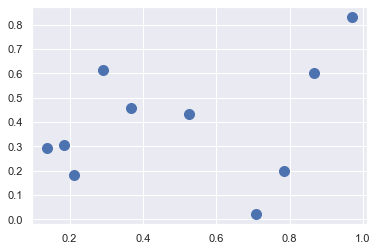

In [60]:
plt.scatter(X[:, 0], X[:, 1], s=100)

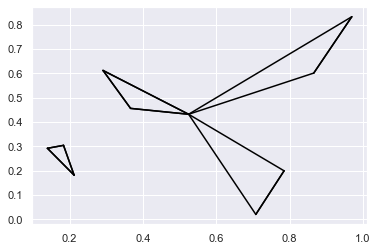

In [62]:
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
 # plot a line from X[i] to X[j]
 # use some zip magic to make it happen:
     plt.plot(*zip(X[j], X[i]), color='black')
